# SOCIAL MEDIA ANALYTICS 1
***
# <center> Tunggal Manda Ary Triyono
# ---------------------------------------------------------------------------------------------------------------

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

# Import Dataset

In [2]:
df = pd.read_csv('tweets.csv')

# Dataset

In [3]:
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN


# Total tweets

In [4]:
print('Total tweets :',df.shape[0])

Total tweets : 14485


# Cek Missing Value

In [5]:
pd.DataFrame(df.isna().sum().sort_values(ascending=False),columns=['Missing Value'])

,Missing Value
negativereason_gold,14453
airline_sentiment_gold,14445
tweet_coord,13478
negativereason,5403
user_timezone,4775
tweet_location,4687
negativereason_confidence,4069
tweet_created,0
text,0
retweet_count,0


***
Banyak Feature yang memiliki Missing value yang banyak, bahkan feature yang hampir missing semua valuenya.. Pada case ini, missing value tersebut tidak di olah terlebih dahulu karena pada case ini hanya akan dilakukan EDA
***

# List Airline yang Ada pada Data

In [6]:
airlines= df['airline'].unique().tolist()
airlines

['Delta', 'United', 'Southwest', 'US Airways', 'Virgin America', 'American']

# Jenis Sentiment

In [7]:
sentiments= df['airline_sentiment'].unique().tolist()
sentiments

['neutral', 'negative', 'positive']

# ----------------------------------------------- EDA ---------------------------------------------------

# 10 Kota dengan tweet terbanyak terkait airlines

Text(0.5,0,'City')

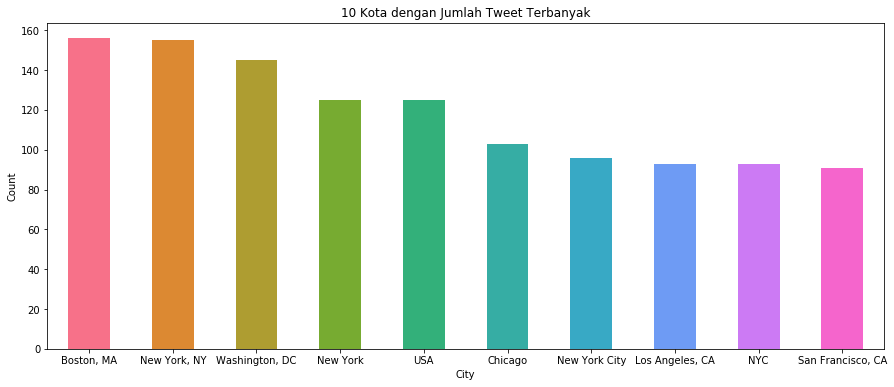

In [8]:
colors=sns.color_palette("husl", 10) 

tweet_city = pd.Series(df["tweet_location"].value_counts(),name='').head(10)
tweet_city.plot(kind = "bar", color=colors,fontsize=10,rot = 0, figsize=(15,6),
                        title = "10 Kota dengan Jumlah Tweet Terbanyak")
plt.ylabel('Count')
plt.xlabel('City')

***
Dari grafik diatas dapat dilihat bahwa Kota yang penduduknya banyak mengungkapkan sentimen terkait airline adalah **Boston**
***

# Tanggal dengan tweet terbanyak terkait airlines

Text(0.5,0,'tweet_created')

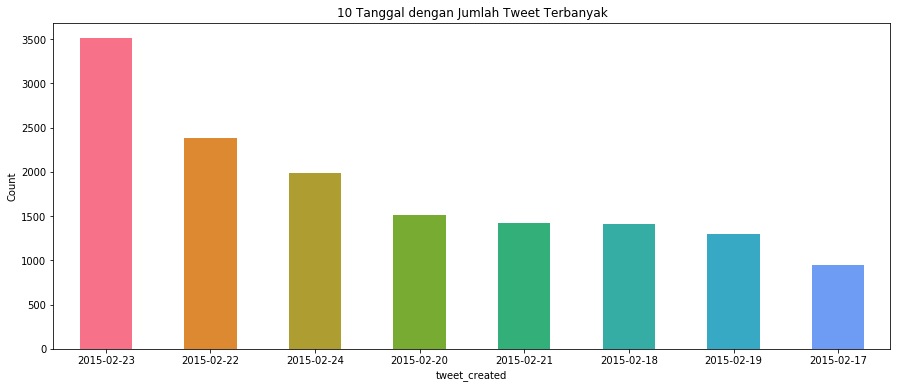

In [9]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df["date_created"] = df["tweet_created"].dt.date
tweet_created = pd.Series(df["date_created"].value_counts(),name='').head(10)
tweet_created.plot(kind = "bar", color=colors,fontsize=10,rot = 0, figsize=(15,6),
                        title = "10 Tanggal dengan Jumlah Tweet Terbanyak")
plt.ylabel('Count')
plt.xlabel('tweet_created')

***
Tanggal dimana banyak tweet terkait airline adalah tanggal 23 Februari 2015 dengan jumlah 3500an tweet
***

# Jumlah Negative Sentiment dari waktu ke waktu

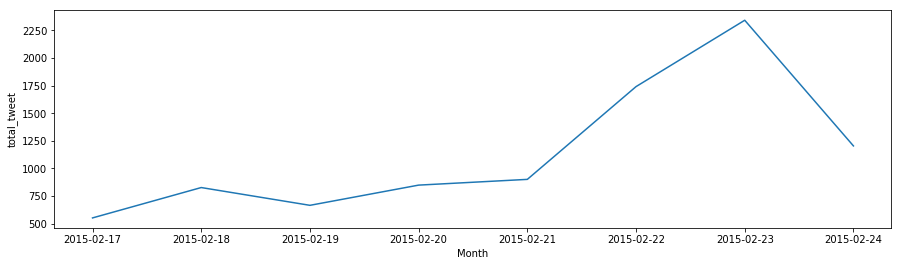

In [10]:
neg_tweet=df[df['airline_sentiment']=="negative"]
count=dict(neg_tweet['date_created'].value_counts())
Unique_date=list(df['date_created'].unique())
date_frame=pd.DataFrame({'Date':Unique_date})
date_frame['total_tweet']=date_frame['Date'].apply(lambda x: count[x])
date_frame.set_index('Date', inplace=True)
plt.figure(figsize=(15,4))
gca=plt.gca()
gca.set_xlabel('Month')
gca.set_ylabel('total_tweet')
plt.plot(date_frame)

***
**Negative Sentiment** semakin **meningkat dari tanggal 17- tanggal 23**. Puncaknya adalah pada tanggal 23. Tanggal 24 **negative sentiment menurun**
***

# Jam dengan Jumlah Tweet Terbanyak

Text(0.5,0,'tweet_created')

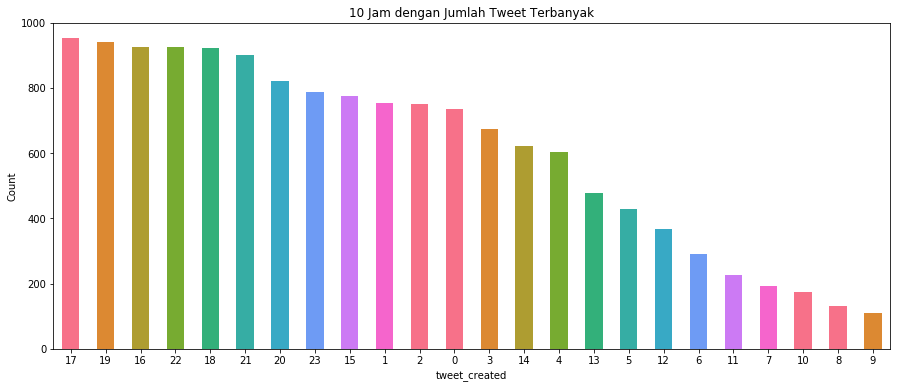

In [11]:
#df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df["hour_created"] = df["tweet_created"].dt.hour
tweet_created_hour = pd.Series(df["hour_created"].value_counts(),name='')
tweet_created_hour.plot(kind = "bar", color=colors,fontsize=10,rot = 0, figsize=(15,6),
                        title = "10 Jam dengan Jumlah Tweet Terbanyak")
plt.ylabel('Count')
plt.xlabel('tweet_created')

***
Tweet terkait Airline di amerika kebanyakan ada pada **sore dan malam hari**
***

# Total Tweet pada setiap Airline

Text(0,0.5,'No. of Tweets')

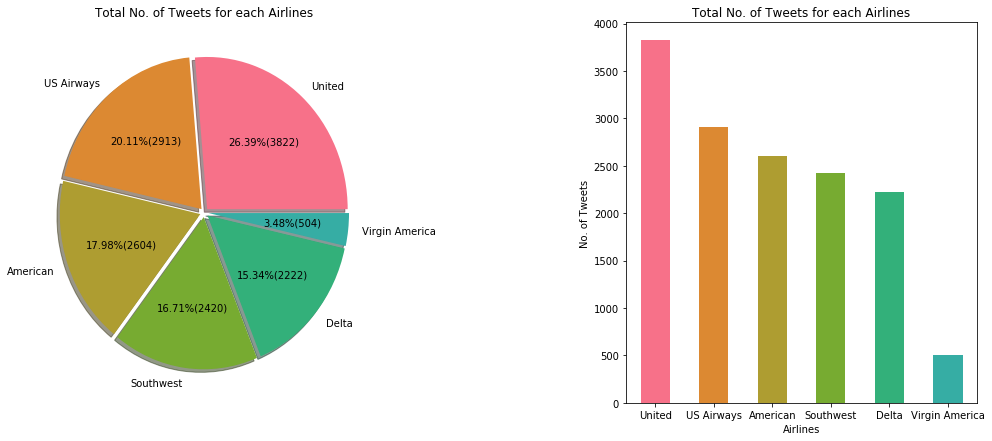

In [12]:
airline_totalTweet = pd.Series(df["airline"].value_counts(),name='')

f=plt.figure(figsize=(17,7))
f.add_subplot(1,2,1)
airline_totalTweet.plot(kind='pie', title='Total No. of Tweets for each Airlines',
            autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*airline_totalTweet.sum()),
            colors=colors, shadow=True, explode=[0.03,0.03,0.03,0.03,0.03,0.03])
plt.subplots_adjust(wspace=0.7)

f.add_subplot(1,2,2)
airline_totalTweet.plot(kind = "bar", color=colors,fontsize=10,rot = 0, 
                        title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

***
Berdasarkan grafik diatas, penumpang banyak mentweet tentang **United Airline**. Sedangkan yang paling sedikit muncul pada tweet penumpang adalah **Virgin America**.
***

# Total Tweet pada setiap Sentiment

Text(0,0.5,'No. of Tweets')

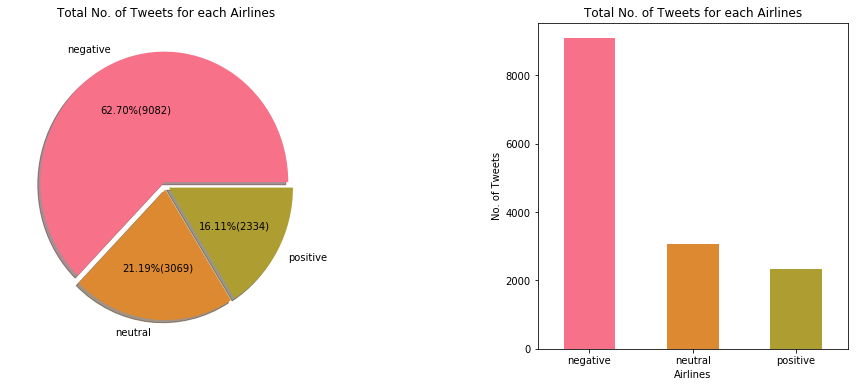

In [13]:
eachSentiment = pd.Series(df["airline_sentiment"].value_counts(),name='')

colors=sns.color_palette("husl", 10) 

f=plt.figure(figsize=(15,6))
f.add_subplot(1,2,1)
eachSentiment.plot(kind='pie', title='Total No. of Tweets for each Airlines',
            autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*eachSentiment.sum()),
            colors=colors, shadow=True, explode=[0.03,0.03,0.03])
plt.subplots_adjust(wspace=0.7)

f.add_subplot(1,2,2)
eachSentiment.plot(kind = "bar", color=colors,fontsize=10,rot = 0, 
                   title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

***
**Sebagian besar** penumpang yang menuliskan tweet di twitter adalah penumpang dengan **sentiment negative**. Gapnyapun cukup jauh, sentiment negative mencapai **62%** dari seluruh tweet dalam dataset. sedangkan yang **peling sedikit** adalah **sentiment positif** yang hanya **16%**. Adalah lumrah jika sosial media seperti sebagian besar diisi oleh keluhan.
***

# Total setiap Sentiment pada setiap Airline

In [14]:
airline_senti=pd.crosstab(df.airline, df.airline_sentiment)
percent=airline_senti.apply(lambda a: a / a.sum() * 100, axis=1)

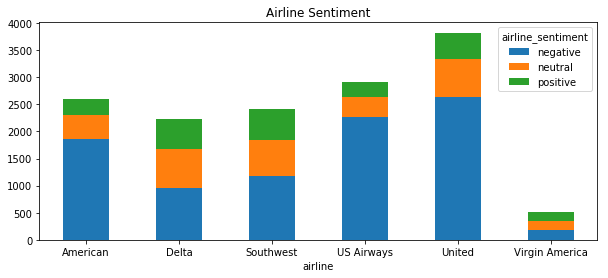

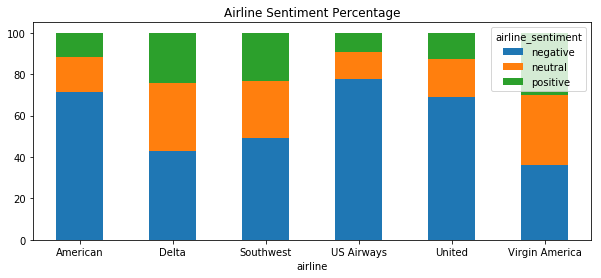

In [15]:
airline_senti.plot(kind='bar', figsize=(10,4), rot=0,stacked=True,title="Airline Sentiment")

percent.plot(kind='bar', figsize=(10,4), rot=0,stacked=True,title="Airline Sentiment Percentage")

***
Airline yang paling banyak menjadi bahan perbincangan di twitter adalah **United** Airline, United Airline juga menjadi maskapai dengan sentiment negative terbanyak, Sentiment negative paling sedikit ada pada Virgin America Airline. hal ini dikarenakan **Virgin America** adalah Airline yang paling sedikit diperbincangkan.
<br>Airline dengan persentase sentiment negative terbesar adalah **US Airways** Airline. Sedangkan Airlane dengan persentase sentiment positif dan neutral terbanyak adalah **virgin america** Airline dan **Delta** Airline.
***

# Negative reason pada semua Airline

In [16]:
#get the number of negative reasons
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    Reason_frame = Reason_frame.sort_values(by='count',ascending=False)
    return Reason_frame

def plot_reason(Airline):  
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.barh(Index,count, color=colors)
    plt.yticks(Index,a['Reasons'])
    plt.xlabel('Count')
    plt.ylabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    plt.gca().invert_yaxis()

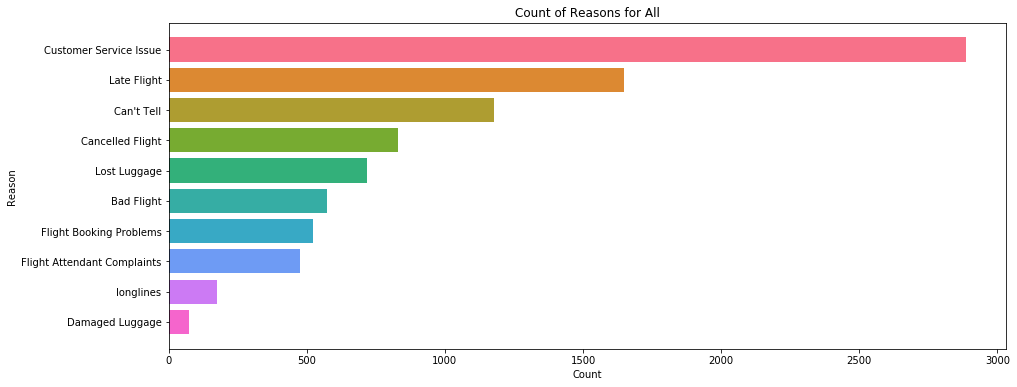

In [17]:
plt.figure(figsize=(15,6))
plot_reason('All')

***
Dari grafik diatas dapat dilihat bahwa sebagian besar negative reason yang di sampaikan penumpang semua airline adalah terkait **Customer Service Issue**.
***

# Negative Reason pada setiap Airline

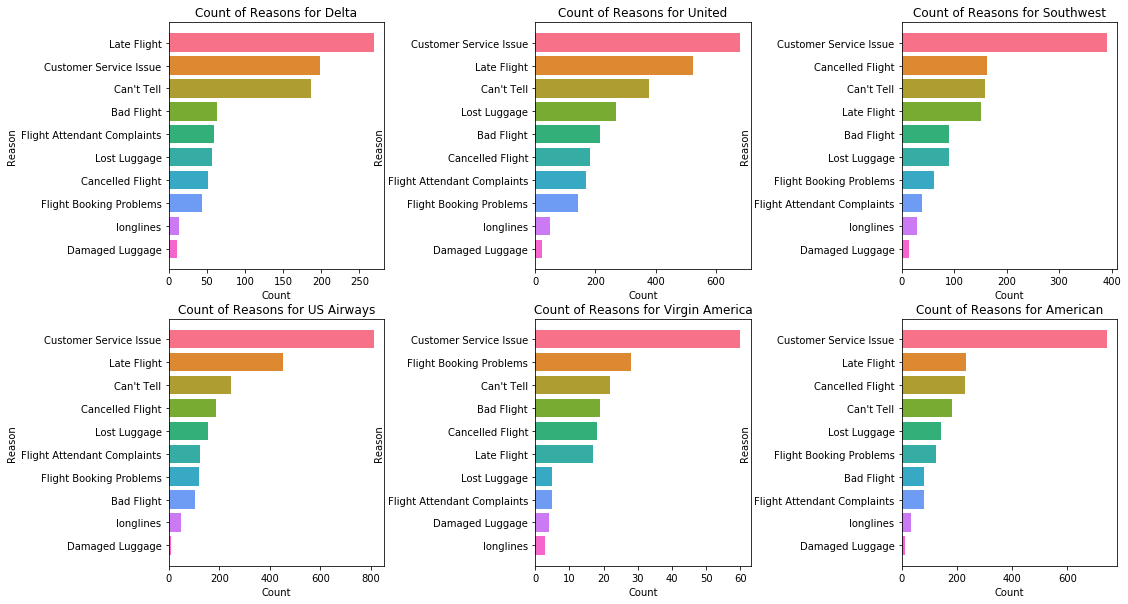

In [18]:
plt.figure(2,figsize=(17, 10))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(wspace=0.7)
    plot_reason(i)

***
Dari Ke 6 Grafik diatas dapat disimpulkan bahwa pada maskapai **Delta**, issue yang sering dikeluhkan pelanggan adalah **late flight** atau penerbangan yang terlambat. Sedangkan pada **maskapai lain** sebagian besar pelanggannya banyak mengeluhkan terkait **customer Service Issue**.
***

# Wordcloud dari semua Tweet

In [19]:
df_all=df
words_all = ' '.join(df_all['text'])
cleaned_word_all = " ".join([word_all for word_all in words_all.split()
                            if 'http' not in word_all
                                and not word_all.startswith('@')
                                and word_all != 'RT'])

wordcloud_all = WordCloud(stopwords=STOPWORDS, background_color='white', width=3000, height=2500).generate(cleaned_word_all)

Text(0.5,1,'ALL WORDCLOUD')

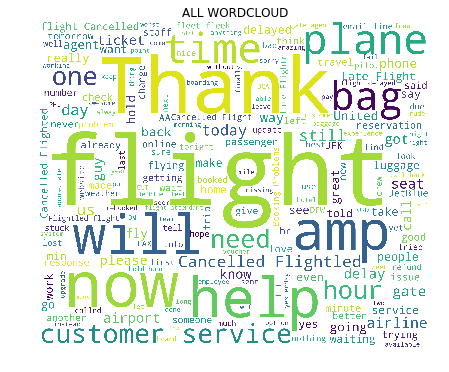

In [20]:
plt.figure(figsize=(7,7))
plt.imshow(wordcloud_all)
plt.axis('off')
plt.title('ALL WORDCLOUD')

***
Kata yang kerap ada pada tweet penumpang semua airline adalah flight, thank, now, amp, help, bag, will, plane, need, time, customer service
***

# Wordcloud dari setiap Airline

In [21]:
def worldcloud_wSen(Sentiment):  
    df_wSen=df[df['airline_sentiment']==Sentiment]
    words_wSen = ' '.join(df_wSen['text'])
    cleaned_word_wSen = " ".join([word_wSen for word_wSen in words_wSen.split()
                                if 'http' not in word_wSen
                                    and not word_wSen.startswith('@')
                                    and word_wSen != 'RT'])
    wordcloud_wSen = WordCloud(stopwords=STOPWORDS, background_color='white', width=3000, height=2500).generate(cleaned_word_wSen)
    plt.imshow(wordcloud_wSen)
    plt.axis('off')
    plt.title(Sentiment)

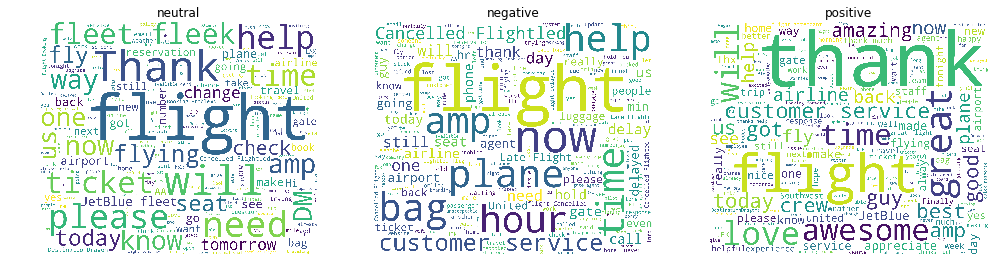

In [22]:
plt.figure(figsize=(17, 13))
for i in sentiments:
    indices= sentiments.index(i)
    plt.subplot(1,3,indices+1)
    worldcloud_wSen(i)

***
Sentiment **neutral** yang sering ada pada tweet penumpang adalalah flight, please, will, help, thank, need, ticket
<br>Sentiment **negative** yang sering ada pada tweet penumpang adalalah flight, plane, now, amp, hour, time, bag, customer service, help, cancelled flight
<br>Sentiment **Positive** yang sering ada pada tweet penumpang adalalah thank, flight, great, awesome, love, customer service,
***

# Wordcloud dari setiap Airline

In [23]:
def worldcloud_air(Airline):  
    df_wAir=df[df['airline']==Airline]
    words_wAir = ' '.join(df_wAir['text'])
    cleaned_word_wAir = " ".join([word_wAir for word_wAir in words_wAir.split()
                                if 'http' not in word_wAir
                                    and not word_wAir.startswith('@')
                                    and word_wAir != 'RT'])
    wordcloud_wAir = WordCloud(stopwords=STOPWORDS, background_color='white', width=3000, height=2500).generate(cleaned_word_wAir)
    plt.imshow(wordcloud_wAir)
    plt.axis('off')
    plt.title(Airline)

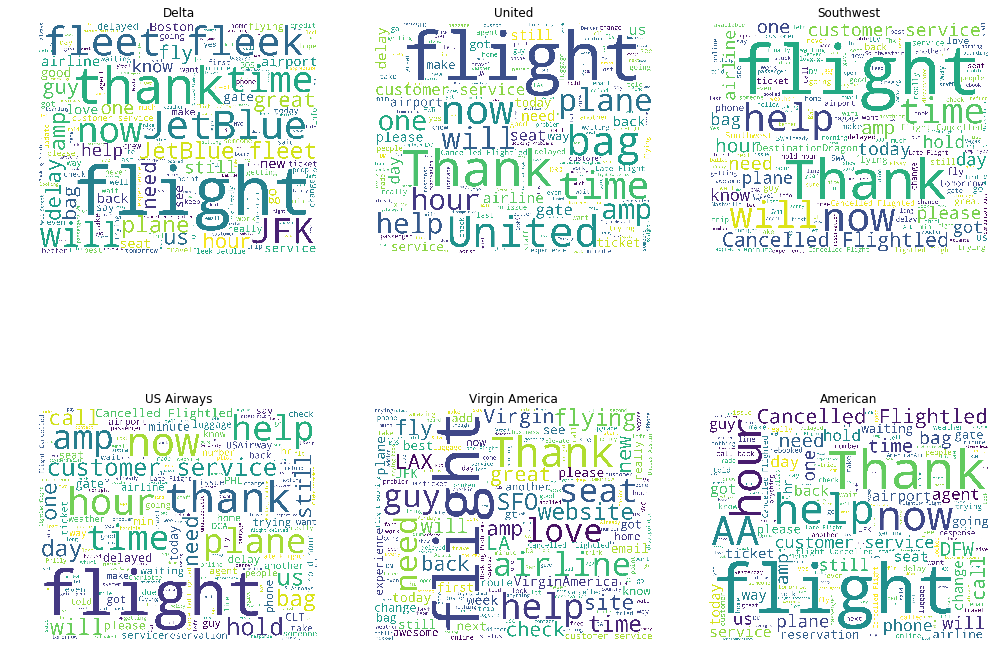

In [24]:
plt.figure(2,figsize=(17, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    worldcloud_air(i)

***
pada **Delta** Airline, kata yang paling sering ada di tweet penumpangnya adalah will, flight, jkf, thank, time, feet, fleek, now
<br>pada **United** Airline, kata yang paling sering ada di tweet penumpangnya adalah flight, amp, will, now, hour, bag, united, help
<br>pada **Southwest** Airline, kata yang paling sering ada di tweet penumpangnya adalah flight, thank, cancelled, time, now, will, help
<br>pada **US Airways** Airline, kata yang paling sering ada di tweet penumpangnya adalah flight, help, now, time, hour, customer service, plane
<br>pada **Virgin America** Airline, kata yang paling sering ada di tweet penumpangnya adalah flight, thank, help, need, flying, seat, love
<br>pada **American** Airline, kata yang paling sering ada di tweet penumpangnya adalah flight, thank, hour, help, now, AA
***

# Kesimpulan 

**Tweet** terkait Airline di US banyak terjadi pada **23 Februari 2015**. Tweet terkait Airline kebanyakan ada pada pada **sore** dan **malam** hari.
airline yang paling **banyak** diperbincangkan adalah **United Airline**. Sedangkan yang paling **sedikit** muncul pada tweet penumpang adalah **Virgin America**.
**62% penumpang** yang menuliskan tweet di twitter adalah penumpang dengan **sentiment negative**.
**United Airline** juga menjadi maskapai dengan **sentiment negative terbanyak**.
Airline dengan **persentase sentiment negative terbesar** adalah **US Airways Airline**.
Sebagian besar **negative reason** yang di sampaikan penumpang semua airline adalah terkait **Customer Service Issue**.
**Kata** yang kerap ada pada tweet penumpang semua airline adalah **flight, thank, now, amp, help, bag, will, plane, need, time, customer service**.
Kata **Flight** selalu menonjol di setiap **Wordcloud**, baik sentiment negative, positif maupun netral, dan juga di setiap wordcloud pada masing-masing airline. hal ini dikarenakan dataset ini merupakan dataset terkait dunia maskapai penerbangan.